/opt/anaconda3/envs/qrw/bin/python


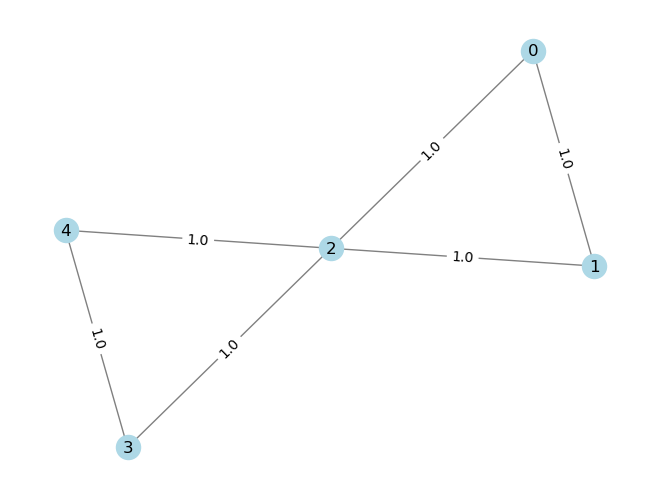

[[0. 1. 1. 0. 0.]
 [1. 0. 1. 0. 0.]
 [1. 1. 0. 1. 1.]
 [0. 0. 1. 0. 1.]
 [0. 0. 1. 1. 0.]]
Problem name: Max-cut

Maximize
  -2*x_0*x_1 - 2*x_0*x_2 - 2*x_1*x_2 - 2*x_2*x_3 - 2*x_2*x_4 - 2*x_3*x_4 + 2*x_0
  + 2*x_1 + 4*x_2 + 2*x_3 + 2*x_4

Subject to
  No constraints

  Binary variables (5)
    x_0 x_1 x_2 x_3 x_4

SparsePauliOp(['IIIZZ', 'IIZIZ', 'IIZZI', 'IZZII', 'ZIZII', 'ZZIII'],
              coeffs=[0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j]) -3.0
energy: -1.0
max-cut objective: -4.0
objective function value: 4.0
variable values: x_0=0.0, x_1=1.0, x_2=1.0, x_3=1.0, x_4=0.0
status: SUCCESS
[[-0.+0.j -0.+0.j -0.+0.j ... -0.+0.j -0.+0.j -0.+0.j]
 [-0.+0.j -2.+0.j -0.+0.j ... -0.+0.j -0.+0.j -0.+0.j]
 [-0.+0.j -0.+0.j -2.+0.j ... -0.+0.j -0.+0.j -0.+0.j]
 ...
 [-0.+0.j -0.+0.j -0.+0.j ... -2.+0.j -0.+0.j -0.+0.j]
 [-0.+0.j -0.+0.j -0.+0.j ... -0.+0.j -2.+0.j -0.+0.j]
 [-0.+0.j -0.+0.j -0.+0.j ... -0.+0.j -0.+0.j -0.+0.j]]
-4.0


In [71]:
import numpy as np
import sys
print(sys.executable)

import utils 
import Qmaxcut
import Cmaxcut
import importlib
from qiskit_algorithms import NumPyMinimumEigensolver

importlib.reload(utils)
importlib.reload(Qmaxcut)
importlib.reload(Cmaxcut)

n=np.arange(0, 5, 1)
w_e=[(0, 1, 1.0), (0, 2, 1.0), (1, 2, 1.0), (3, 2, 1.0), (3, 4, 1.0), (4, 2, 1.0)]
G = utils.createGraph(n, w_e)
utils.visualizeGraph(G)
prob=utils.encode(G)

qubitOp, offset=prob.to_ising()
print(qubitOp, offset)
ee = NumPyMinimumEigensolver()
result = ee.compute_minimum_eigenvalue(qubitOp)
print("energy:", result.eigenvalue.real)
print("max-cut objective:", result.eigenvalue.real + offset)

#compute solution from inbuilt solver
utils.classicalMaxcutInbuilt(prob)

#check that this is the same as maxcut objective from inbuilt
H_cost = Cmaxcut.problemHamiltonian(G)
print(H_cost)
eigenvalues, _ = np.linalg.eigh(H_cost)
min_eigenvalue = np.min(eigenvalues)
print(min_eigenvalue)






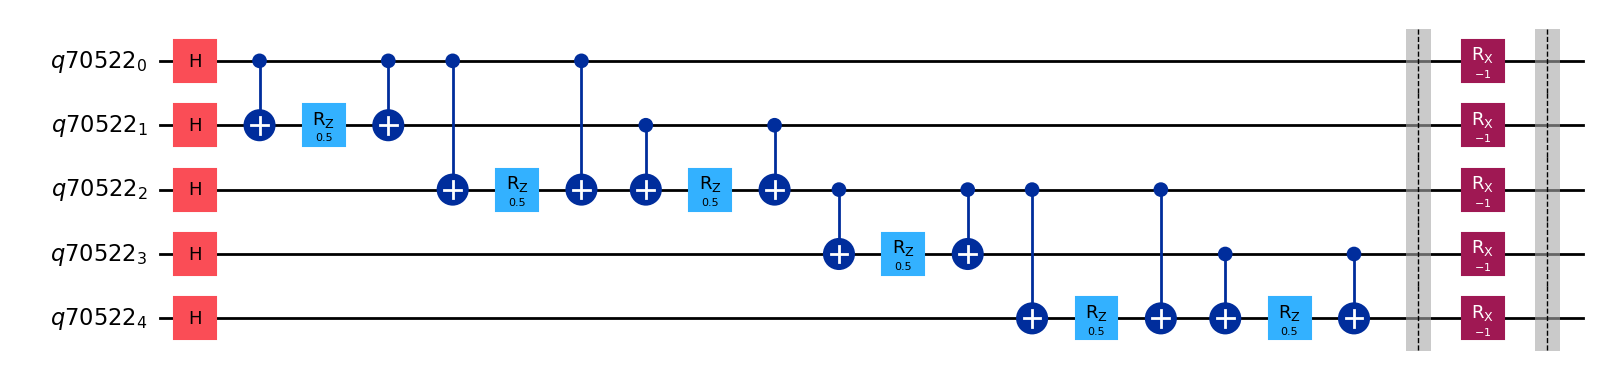

In [72]:
#t, gamma, n
qc = Qmaxcut.trotterized_qrw_circuit(G, 0.5, 1, 1)
qc.draw(output='mpl')

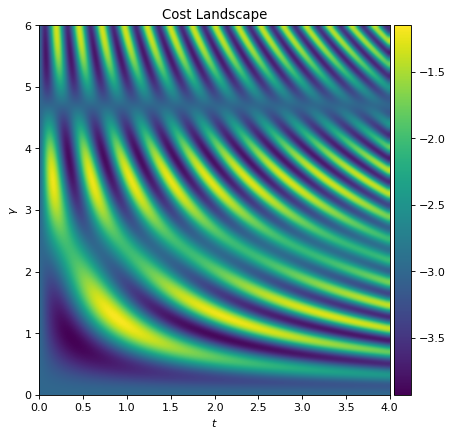

-3.9285142374315094


In [73]:
gamma = np.linspace(0, 4, 100)
t = np.linspace(0, 6, 100)
exp_val= Qmaxcut.cost_landscape_trotterized_qw(G, t, gamma, 1, H_cost)
print(exp_val.min())

In [7]:
#tests with to_ising() Hamiltonian
paulis = qubitOp.paulis  
coeffs = qubitOp.coeffs  
print(paulis, coeffs)

ising_matrix = qubitOp.to_matrix()
print(ising_matrix)

eigenvalues, _ = np.linalg.eigh(ising_matrix)
min_eigenvalue = np.min(eigenvalues)
print(min_eigenvalue)

['IIIZZ', 'IIZIZ', 'IIZZI', 'IZZII', 'ZIZII', 'ZZIII'] [0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]
[[3.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 3.+0.j]]
-1.0


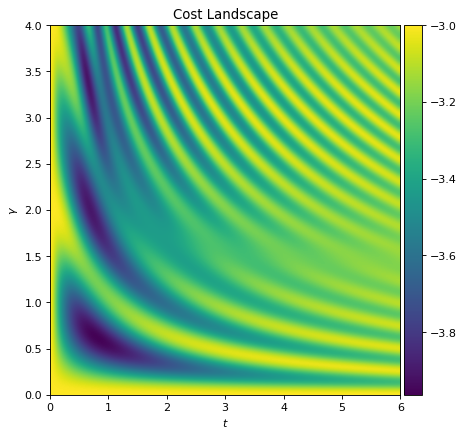

array([[-3.        , -3.        , -3.        , ..., -3.        ,
        -3.        , -3.        ],
       [-3.        , -3.00088872, -3.00177722, ..., -3.07914593,
        -3.07982708, -3.08050435],
       [-3.        , -3.00353423, -3.007065  , ..., -3.24130909,
        -3.24206327, -3.24277514],
       ...,
       [-3.        , -3.01426163, -3.02775372, ..., -3.16256479,
        -3.22653176, -3.23973798],
       [-3.        , -3.00943174, -3.02994107, ..., -3.22601085,
        -3.23504558, -3.18685638],
       [-3.        , -3.00624165, -3.03524317, ..., -3.23078016,
        -3.1842391 , -3.12416084]])

In [8]:
H_cost = Cmaxcut.problemHamiltonian(G)

H_walk = Cmaxcut.hypercubeHamiltonian(5)

initial_state = Cmaxcut.initialState(5)

gamma = np.linspace(0, 4, 100)
t = np.linspace(0, 6, 100)

Cmaxcut.QW(H_cost, H_walk, t, initial_state, gamma)
Cmaxcut.costLandscape(H_cost, H_walk, t, initial_state, gamma, 0) #offset 0


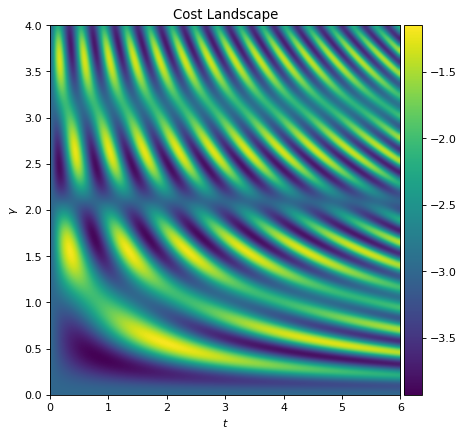

array([[-3.        , -3.        , -3.        , ..., -3.        ,
        -3.        , -3.        ],
       [-3.        , -3.00177407, -3.00354745, ..., -3.14506591,
        -3.1460469 , -3.14701335],
       [-3.        , -3.00701501, -3.014019  , ..., -3.31032062,
        -3.30758373, -3.30472047],
       ...,
       [-3.        , -2.07564816, -1.75053252, ..., -3.58376726,
        -3.81320358, -3.18787562],
       [-3.        , -2.1825487 , -1.92789827, ..., -3.73988011,
        -3.15914877, -2.3083742 ],
       [-3.        , -2.30526517, -2.11772587, ..., -3.14393366,
        -2.41499533, -2.09790788]])

In [75]:
gamma = np.linspace(0, 4, 100)

t = np.linspace(0, 6, 100)
Cmaxcut.trotterizedCostLandscape(H_cost, H_walk, t, initial_state, gamma, 0, 1)

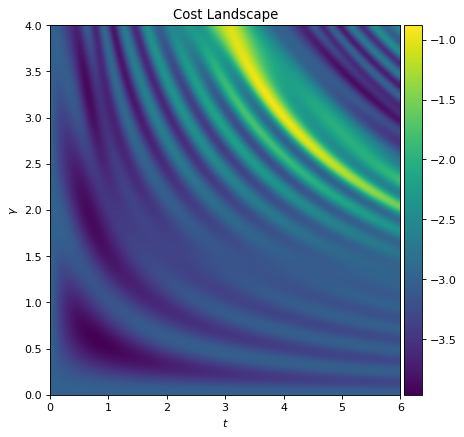

array([[-3.        , -3.        , -3.        , ..., -3.        ,
        -3.        , -3.        ],
       [-3.        , -3.0009774 , -3.00195454, ..., -3.08629873,
        -3.08702645, -3.08774953],
       [-3.        , -3.00388465, -3.00776512, ..., -3.25568108,
        -3.25627843, -3.25682721],
       ...,
       [-3.        , -2.98490242, -3.02672077, ..., -3.13136253,
        -3.08396134, -2.83172351],
       [-3.        , -2.98839705, -3.04346621, ..., -3.05142818,
        -2.81394341, -2.57345829],
       [-3.        , -2.99381762, -3.06227408, ..., -2.80499079,
        -2.59408935, -2.5309712 ]])

In [76]:
Cmaxcut.trotterizedCostLandscape(H_cost, H_walk, t, initial_state, gamma, 0, 10)

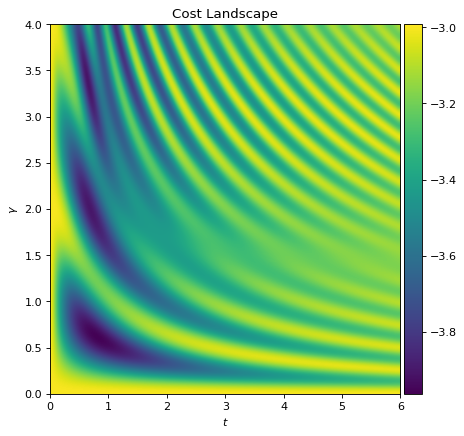

array([[-3.        , -3.        , -3.        , ..., -3.        ,
        -3.        , -3.        ],
       [-3.        , -3.00089759, -3.00179495, ..., -3.079867  ,
        -3.08055297, -3.08123499],
       [-3.        , -3.0035693 , -3.00713506, ..., -3.24281658,
        -3.24355669, -3.24425387],
       ...,
       [-3.        , -3.01152016, -3.02801828, ..., -3.1829675 ,
        -3.22682619, -3.20909027],
       [-3.        , -3.00745059, -3.03175311, ..., -3.22326223,
        -3.2038241 , -3.14253581],
       [-3.        , -3.00507585, -3.03856091, ..., -3.19993583,
        -3.14272508, -3.09603043]])

In [133]:
Cmaxcut.trotterizedCostLandscape(H_cost, H_walk, t, initial_state, gamma, 0, 100)

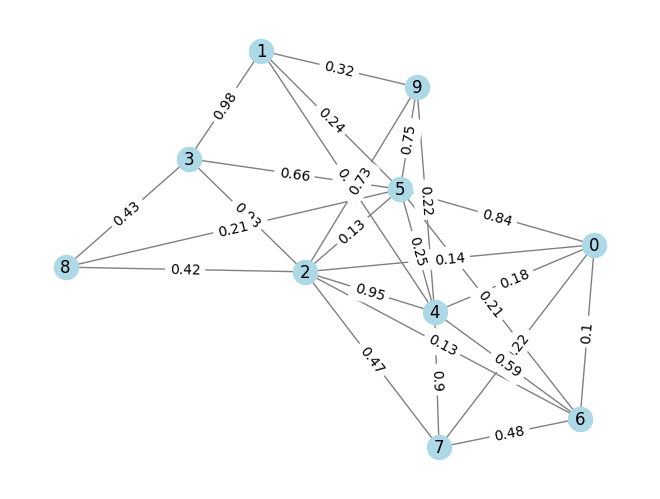

Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Edges with weights: [(0, 2, 0.14), (0, 4, 0.18), (0, 5, 0.84), (0, 6, 0.1), (0, 7, 0.22), (1, 3, 0.98), (1, 4, 0.32), (1, 5, 0.24), (1, 9, 0.32), (2, 3, 0.93), (2, 4, 0.95), (2, 5, 0.13), (2, 6, 0.13), (2, 7, 0.47), (2, 8, 0.42), (2, 9, 0.73), (3, 5, 0.66), (3, 8, 0.43), (4, 5, 0.25), (4, 6, 0.59), (4, 7, 0.9), (4, 9, 0.22), (5, 6, 0.21), (5, 8, 0.21), (5, 9, 0.75), (6, 7, 0.48)]


In [80]:
#test_graph = utils.createRandomGraph(10, 0.5)

n=np.arange(0, 10, 1)
w_e = [(0, 2, 0.14), (0, 4, 0.18), (0, 5, 0.84), (0, 6, 0.1), (0, 7, 0.22), (1, 3, 0.98), (1, 4, 0.32), (1, 5, 0.24), (1, 9, 0.32), (2, 3, 0.93), (2, 4, 0.95), (2, 5, 0.13), (2, 6, 0.13), (2, 7, 0.47), (2, 8, 0.42), (2, 9, 0.73), (3, 5, 0.66), (3, 8, 0.43), (4, 5, 0.25), (4, 6, 0.59), (4, 7, 0.9), (4, 9, 0.22), (5, 6, 0.21), (5, 8, 0.21), (5, 9, 0.75), (6, 7, 0.48)]
test_graph = utils.createGraph(n, w_e)
utils.visualizeGraph(test_graph)
nodes = list(test_graph.nodes)

# Get the list of edges and their weights
edges_with_weights = [(u, v, test_graph.edges[u, v]['weight']) for u, v in test_graph.edges()]

print("Nodes:", nodes)
print("Edges with weights:", edges_with_weights)

In [81]:
test_prob=utils.encode(test_graph)

qubitOp, offset=test_prob.to_ising()
print(qubitOp, offset)
ee = NumPyMinimumEigensolver()
result = ee.compute_minimum_eigenvalue(qubitOp)

print("energy:", result.eigenvalue.real)
print("max-cut objective:", result.eigenvalue.real + offset)

utils.classicalMaxcutInbuilt(test_prob)


[[0.   0.   0.14 0.   0.18 0.84 0.1  0.22 0.   0.  ]
 [0.   0.   0.   0.98 0.32 0.24 0.   0.   0.   0.32]
 [0.14 0.   0.   0.93 0.95 0.13 0.13 0.47 0.42 0.73]
 [0.   0.98 0.93 0.   0.   0.66 0.   0.   0.43 0.  ]
 [0.18 0.32 0.95 0.   0.   0.25 0.59 0.9  0.   0.22]
 [0.84 0.24 0.13 0.66 0.25 0.   0.21 0.   0.21 0.75]
 [0.1  0.   0.13 0.   0.59 0.21 0.   0.48 0.   0.  ]
 [0.22 0.   0.47 0.   0.9  0.   0.48 0.   0.   0.  ]
 [0.   0.   0.42 0.43 0.   0.21 0.   0.   0.   0.  ]
 [0.   0.32 0.73 0.   0.22 0.75 0.   0.   0.   0.  ]]
Problem name: Max-cut

Maximize
  -0.28*x_0*x_2 - 0.36*x_0*x_4 - 1.68*x_0*x_5 - 0.2*x_0*x_6 - 0.44*x_0*x_7
  - 1.96*x_1*x_3 - 0.64*x_1*x_4 - 0.48*x_1*x_5 - 0.64*x_1*x_9 - 1.86*x_2*x_3
  - 1.9*x_2*x_4 - 0.26*x_2*x_5 - 0.26*x_2*x_6 - 0.94*x_2*x_7 - 0.84*x_2*x_8
  - 1.46*x_2*x_9 - 1.32*x_3*x_5 - 0.86*x_3*x_8 - 0.5*x_4*x_5 - 1.18*x_4*x_6
  - 1.8*x_4*x_7 - 0.44*x_4*x_9 - 0.42*x_5*x_6 - 0.42*x_5*x_8 - 1.5*x_5*x_9
  - 0.96*x_6*x_7 + 1.48*x_0 + 1.86*x_1 + 3.9*x_2 + 3.00000

In [86]:
H_cost= Cmaxcut.problemHamiltonian(test_graph)
print(H_cost)

eigenvalues = np.linalg.eigvals(H_cost)

# Print eigenvalues
print("Eigenvalues of the custom Hamiltonian:")
print(eigenvalues)


H_walk = Cmaxcut.hypercubeHamiltonian(10)

initial_state = Cmaxcut.initialState(10)

gamma = np.linspace(0, 4, 100)
t = np.linspace(0, 6, 100)

#Cmaxcut.QW(H_cost, H_walk, t, initial_state, gamma)
#Cmaxcut.costLandscape(H_cost, H_walk, t, initial_state, gamma, 0)

[[-0.  +0.j -0.  +0.j -0.  +0.j ... -0.  +0.j -0.  +0.j -0.  +0.j]
 [-0.  +0.j -2.02+0.j -0.  +0.j ... -0.  +0.j -0.  +0.j -0.  +0.j]
 [-0.  +0.j -0.  +0.j -1.06+0.j ... -0.  +0.j -0.  +0.j -0.  +0.j]
 ...
 [-0.  +0.j -0.  +0.j -0.  +0.j ... -1.06+0.j -0.  +0.j -0.  +0.j]
 [-0.  +0.j -0.  +0.j -0.  +0.j ... -0.  +0.j -2.02+0.j -0.  +0.j]
 [-0.  +0.j -0.  +0.j -0.  +0.j ... -0.  +0.j -0.  +0.j -0.  +0.j]]
Eigenvalues of the custom Hamiltonian:
[-0.  +0.j -2.02+0.j -1.06+0.j ... -1.06+0.j -2.02+0.j -0.  +0.j]


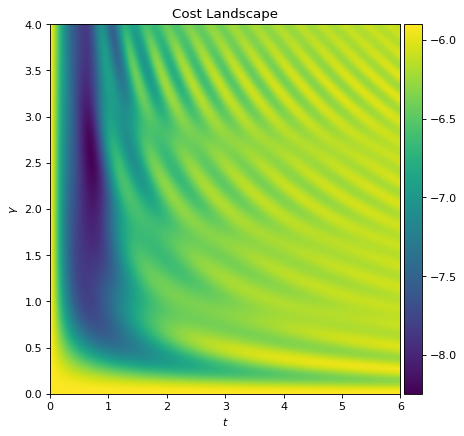

In [87]:
n=np.arange(0, 10, 1)
w_e=[(0, 2, 0.14), (0, 4, 0.18), (0, 5, 0.84), (0, 6, 0.1), (0, 7, 0.22), (1, 3, 0.98), (1, 4, 0.32), (1, 5, 0.24), (1, 9, 0.32), (2, 3, 0.93), (2, 4, 0.95), (2, 5, 0.13), (2, 6, 0.13), (2, 7, 0.47), (2, 8, 0.42), (2, 9, 0.73), (3, 5, 0.66), (3, 8, 0.43), (4, 5, 0.25), (4, 6, 0.59), (4, 7, 0.9), (4, 9, 0.22), (5, 6, 0.21), (5, 8, 0.21), (5, 9, 0.75), (6, 7, 0.48)]
G = utils.createGraph(n, w_e)

H_cost = Cmaxcut.problemHamiltonian(G)

H_walk = Cmaxcut.hypercubeHamiltonian(10)

initial_state = Cmaxcut.initialState(10)

gamma = np.linspace(0, 4, 100)
t = np.linspace(0, 6, 100)

#Cmaxcut.QW(H_cost, H_walk, t, initial_state, gamma)
Cmaxcut.costLandscape(H_cost, H_walk, t, initial_state, gamma, 0) #offset 0


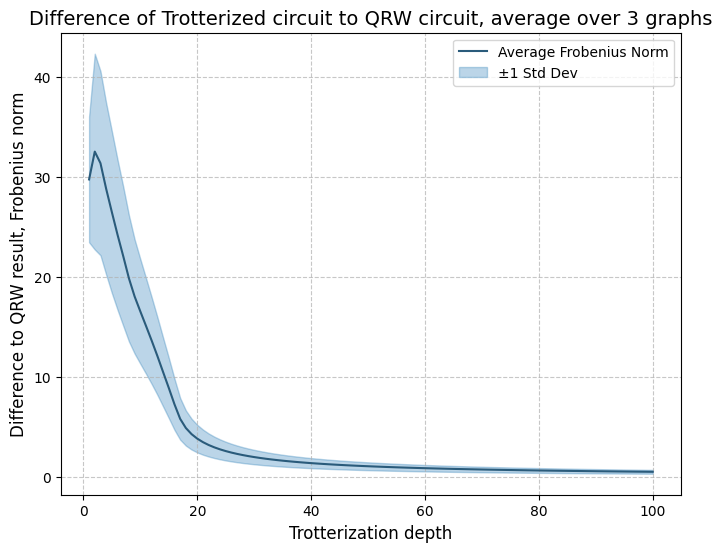

In [124]:
Cmaxcut.trotterizationConvergenceTest3(3,5,100)

In [9]:
import numpy as np
import sys
print(sys.executable)

import utils 
import Qmaxcut
import Cmaxcut
import importlib
from qiskit_algorithms import NumPyMinimumEigensolver

importlib.reload(utils)
importlib.reload(Qmaxcut)
importlib.reload(Cmaxcut)



#import pyvista as pv
#pv.set_jupyter_backend('trame')  # Use Trame as the backend
#pv.set_jupyter_backend('none')
n=np.arange(0, 5, 1)
w_e=[(0, 1, 1.0), (0, 2, 1.0), (1, 2, 1.0), (3, 2, 1.0), (3, 4, 1.0), (4, 2, 1.0)]
G = utils.createGraph(n, w_e)

H_cost = Cmaxcut.problemHamiltonian(G)

H_walk = Cmaxcut.hypercubeHamiltonian(5)

initial_state = Cmaxcut.initialState(5)

gamma = np.linspace(0, 1, 10)
t = np.linspace(0, 1, 10)
beta= np.linspace(0, 1, 10)

#costLandscapeNonVarQWOA(H_cost, H_walk, t, initial_state, gamma, beta, p, std_dev):
Cmaxcut.costLandscapeNonVarQWOA2(H_cost, H_walk, t, initial_state, gamma, beta, 3, 1)

/opt/anaconda3/envs/qrw/bin/python
-3.971728475789394 -1.726712291562997
